### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝 전체 과정을 진행해보자

#### 1. 문제 정의
- 생존/사망을 예측
- kaggle 경진대회에서 높은 순위를 차지해보자

#### 2. 데이터 수집(불러와서 확인)

In [36]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화 라이브러리

- 타이타닉 train 데이터와 test 데이터를 불러와서 변수에 저장(PassengerId라는 컬럼을 인덱스 자리로 옮기면서 불러오기)

In [37]:
# csv -> pd.read_csv
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
# 크기 확인
print('훈련 데이터 크기 :', train.shape)
print('테스트 데이터 크기 :', test.shape)
# 컬럼의 개수가 다르다

훈련 데이터 크기 : (891, 11)
테스트 데이터 크기 : (418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [40]:
train.info()
# 결측치가 있는 컬럼 : Age, Cabin, Embarked
# 데이터 타입 : 숫자(정수, 실수), 문자
# 모델링을 할 때 모델은 숫자데이터만 인식
# 문자 -> 숫자 : 인코딩(라벨인코딩, 원핫인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [41]:
test.info()
# Survived 컬럼이 없다! -> 우리가 맞춰야하는 답 데이터
# y_test는 어디있을까? --> kaggle이 알고 있다
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [86]:
# 컬럼 정보 정리
train.columns
# 'Survived' : 생존/사망 결과값이 담긴 컬럼 (정답데이터) -> 0:사망, 1:생존
# 'Pclass' : 승객 등급 -> 1:상위층, 2:중상위층, 3:하위층
# 'Name'
# 'Sex'
# 'Age'
# 'SibSp' : 형제, 자매, 배우자의 수 (같이 탑승한)
# 'Parch' : 부모/자식의 수 (같이 탑승한)
# 'Ticket' : 티켓번호
# 'Fare' : 요금
# 'Cabin' : 객실번호
# 'Embarked' : 승선항 -> S:Southampton, C:Cherbourg, Q:Queenstown 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

- train : Embarked 컬럼 결측치 채우기

In [87]:
# 데이터 확인 -> train 기준으로 확인
# 좋은 모델을 만드려면 학습 데이터를 잘 구비해야한다. 
# train에서 embarked 컬럼 인덱싱 -> S, C, Q가 몇 개씩 있는지 확인
# 결측치 채우는 방법 
# 1. 제거(제거해도 데이터에 영향이 미미)
# 2. 임의의 값으로 채워넣기(중앙값, 평균값, 최빈값)
train['Embarked'].value_counts()  # S에서 제일 많이 탑승했다

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [43]:
# 결측치 몇 개? -> 2개
train['Embarked'].isnull().sum()  # 불리언 인덱싱의 재료!!
# train['Embarked'] 결측치가 있는 데이터 출력하기
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [44]:
# 두 사람의 데이터가 서로 비슷
# -> 같은 승선항에서 탔을 것이라고 가정
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워보기
# 1. 인덱싱을 하나씩 해서 접근 -> 값을 수정 
# 2. NaN 값(비어있는 값)을 모두 찾아서 대체해주는 함수를 사용 : fillna(값)
# 결측치가 있는 자리에 값을 초기화해서 대입 
train['Embarked'] = train['Embarked'].fillna('S')

In [45]:
train['Embarked'].isnull().sum()  # -> NaN값이 채워졌구나!

0

- test데이터에 있는 Fare 컬럼 결측치 채우기

In [46]:
# test 데이터에서 Fare 컬럼 인덱싱한 후 결측치가 존재하는 행 출력하기
# test['Fare'].isnull().sum()
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
# Pclass 혹은 성별 혹은 도시와 연관이 되지 않았을까?
# 상관관계 확인
train.corr(numeric_only = True) # 문자열로 된 컬럼 포함 -> 상관계수 X 
# Fare컬럼과 연관이 있는 컬럼은 무엇일까? -> Pclass
# -1 ~ +1로 표현되는 계수
# -1과 +1에 가까울수록 속성간에 관계가 깊다 
# 0에 가까울수록 상대적으로 관계가 깊지 않다(적음)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [48]:
# train데이터의 Fare 컬럼 기술통계량 확인
# describe()
# 중앙값, 평균값 중에 대표값으로 설정할 값을 찾기 위해
train['Fare'].describe()  # 평균값이 아닌 중앙값을 대표값으로 선택

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [49]:
# Pclass, Sex -> Fare 중앙, 평균 값으로 결측치를 대체해보자
# 1. female -> Fare 중앙 값, 평균 값을 확인하고 해당 값으로 채워보자
# 2. male -> Fare 값을 채워보자
# 3. test['Fare'] 3등급, 남성 승객의 중앙값
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)
# 중앙값 median() -> 써주지 않으면 그룹화 되었다고만 나온다
# train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']) 
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [50]:
# test['Fare'] 결측치를 채워주자 -> 7.925 (Pclass : 3, Sex : male)
test['Fare'] = test['Fare'].fillna('7.925')
test['Fare'].isna().sum() # 처리 확인

0

- Age 결측치 채우기
    - train, test 모두 처리
    - 나이의 평균, 중앙값으로 결측치를 채워보자
    - 다른 컬럼과의 상관관계를 이용하여 결측치 채워보기

In [51]:
# 기술통계량
# 중앙값 vs 평균값? -> 평균값(mean)
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [53]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기! -> Pclass
# train.corr(numeric_only = True)['Age']
# train.corr(numeric_only = True)['Age'].sort_values(ascending=True)
train.corr(numeric_only = True)['Age'].abs().sort_values(ascending=True)  # abs() : 절대값

Survived    0.077221
Fare        0.096067
Parch       0.189119
SibSp       0.308247
Pclass      0.369226
Age         1.000000
Name: Age, dtype: float64

In [54]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기
# female, age 평균
# male, age 평균
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [55]:
# gb1 3등급, male 나이 평균값 접근해보기
# 멀티인덱스 접근방법
# gb1.loc[3]
gb1.loc[(3, 'male')]  # 튜플 단위로 묶어주기

Age    26.507589
Name: (3, male), dtype: float64

In [56]:
# 1등급 여성 나이 평균 출력해보기
gb1.loc[(1, 'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [57]:
train[train['Age'].isnull()]['Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [58]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [59]:
# 결측치를 채우기 위해서 각 승객의 등급, 성별을 확인한 후 
# Age 평균값을 인덱싱하여 채움
def pre_age(row):
    # 만약 나이가 결측치라면, 값을 가져오고 row에는 한사람의 정보가 담긴다.
    if np.isnan(row['Age']): # 결측치를 확인하는 함수 == np.isnan(대상)
        return gb1.loc[(row['Pclass'],row['Sex'])]
    # 만약 나이가 결측치가 아니라면, 원래 나이값을 그대로 사용
    else : 
        return row['Age']
    
# apply() : 다차원으로 되어있는 데이터에 모두 적용시키는 함수
train['Age'] = train.apply(pre_age, axis = 1) 
train['Age'].isnull().sum()

0

In [60]:
# test 데이터의 Age 컬럼 결측치도 처리
test['Age'] = test.apply(pre_age, axis = 1)
test['Age'].isnull().sum()

0

In [65]:
# 멀티인덱싱을 해서 'Age 21.2435' 이런식으로 들어가있음 
# 숫자만 들어가도록 바꿔주기
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
test['Age'].dtype

dtype('int64')

- train, test : Cabin(객실번호) 채우기

In [66]:
# train['Cabin'] 결측치는 몇 개 있을까?
train['Cabin'].isnull().sum()

687

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [71]:
# 중복없이 값 확인
# unique()
train['Cabin'].unique()
# 생김새 : 층 + 방번호 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [72]:
train.columns  
# Pclass도 객실을 나타냄 -> 다시 할 필요는 없을 듯.

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
# Cabin의 결측치를 임의로 'M'값으로 채워보기
# fillna()로 결측치를 처리한 후 Deck 컬럼을 생성해서 담기
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [75]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [76]:
# Cabin 컬럼 삭제
# drop()
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [77]:
# 결측치 제거 다 됐는지 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [79]:
# 결측치 제거 다 됐는지 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    object
 8   Embarked  418 non-null    object
 9   Deck      418 non-null    object
dtypes: int64(4), object(6)
memory usage: 35.9+ KB


#### 데이터 탐색

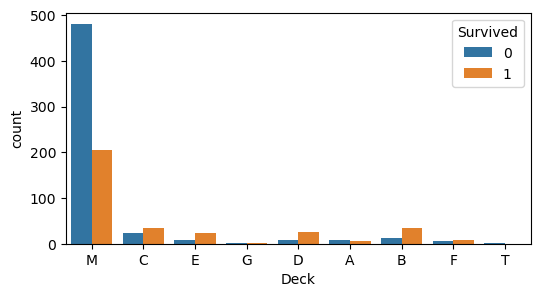

In [80]:
# Deck 컬럼과 Survived 컬럼의 연관성 확인
# 막대그래프 활용 
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Deck', hue = 'Survived')
plt.show()

In [ ]:
# M에서 상대적으로 많은 사람들이 사망했다
# Survived에 영향을 주지는 않을까?

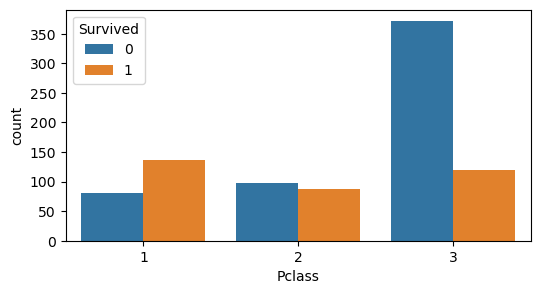

In [81]:
# Pclass와 Survived 시각화 
# countplot
# 생존/사망 의미 파악해보기
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

In [ ]:
# 1등급 - 비교적 생존율 높음
# 2등급 - 사망율이 생존율보다 조금 높다
# 3등급 - 사망율이 월등히 높다

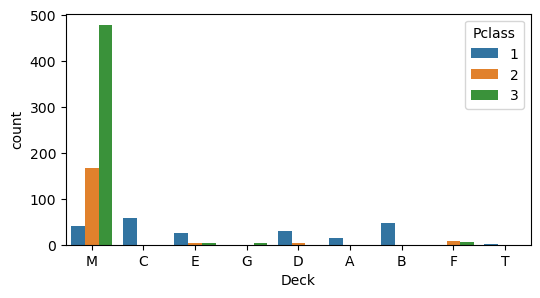

In [82]:
# Deck와 Pclass를 연관지어서 시각화
# X = Deck
# hue = Pclass
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.show()

In [ ]:
# M에서 사망율이 높았던 건 3등급의 사람이 많아서였음
# Deck라는 컬럼이 생존/사망에 크게 영향을 주고 있는 것은 아니다
# 오히려 Pclass는 영향을 크게 미치고 있다. 

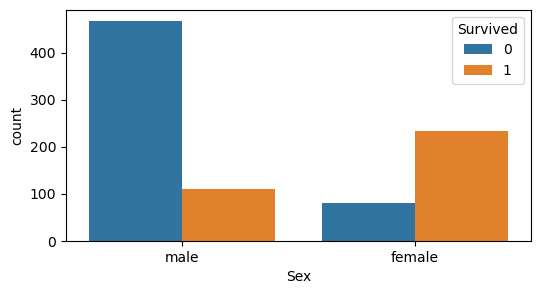

In [83]:
# Sex와 Survived의 시각화
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

In [ ]:
# 남성은 상대적으로 사망율이 높음
# 여성은 상대적으로 생존율이 높음
# 생존/사망을 판별하는데 성별은 도움이 되겠다!

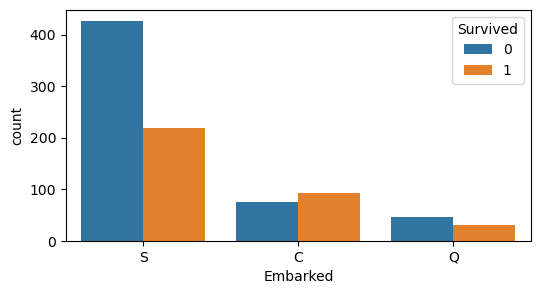

In [84]:
# Embarked와 Survived의 관계 시각화
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

In [ ]:
# 승선항이 생존과 사망에 영향을 미쳤는지 아닌지 확고한 증거가 없다. 